# Цель работы:

Изучение методов кластерного анализа на примере алгоритма K-средних, а также приобретение навыков рефакторинга кода и определения оптимального количества кластеров.

# Задание:

1.	Реализация кластерного анализа на языке Python с использованием библиотек scikit-learn и pandas.
2.	Исследование методов определения оптимального числа кластеров (метод локтя).
3.	Интерпретация результатов кластеризации для различных значений K.

# Теоретическая часть

## Ответы на контрольные вопросы:

1. Кластерный анализ — метод машинного обучения для группировки объектов в кластеры на основе их схожести.

2. Методы кластерного анализа:

    - K-средних (K-Means).

    - Иерархическая кластеризация.

    - DBSCAN.

3. Используемые классы и функции Python:

    - KMeans из sklearn.cluster.

    - pandas для обработки данных.

    - matplotlib для визуализации.

4. Определение оптимального числа кластеров:
Метод локтя — анализ графика зависимости суммы квадратов расстояний (WCSS) от числа кластеров.

5. Отличия методов:

    - Кластеризация: группировка без меток.

    - Классификация: предсказание меток.

    - Регрессия: предсказание непрерывных значений.

# Практическая часть

## Описание данных

Используемый датасет: airline_passenger-satisfaction.csv (25977 наченией)

Использованы 5 ключевых признаков:

- Age – возраст пассажира

- Flight Distance – расстояние полета (км)

- Seat comfort – оценка комфорта сидений (1-5)

- Food and drink – оценка питания (1-5)

- Inflight entertainment – оценка развлечений (1-5)

## Подключение нужных библиотек

In [6]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Настройка отображения
pd.set_option('display.max_columns', None)
%matplotlib inline

## Предобработка данных

In [11]:
# Загрузка данных
df = pd.read_csv('airline_passenger_satisfaction.csv')

# Просмотр структуры данных
print(f"Размер датасета: {df.shape}")

# Проверка пропущенных значений
print("\nКоличество пропущенных значений:")
print(df.isna().sum())

# Выбор признаков для кластеризации
features = ['Age', 'Flight Distance', 'Seat comfort', 'Food and drink', 'Inflight entertainment']
X = df[features].dropna()

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание чистого датафрейма
df_clean = df.dropna(subset=features).copy()
print(f"\nРазмер данных после очистки: {df_clean.shape}")

Размер датасета: (25976, 25)

Количество пропущенных значений:
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in 

## Определение оптимального числа кластеров

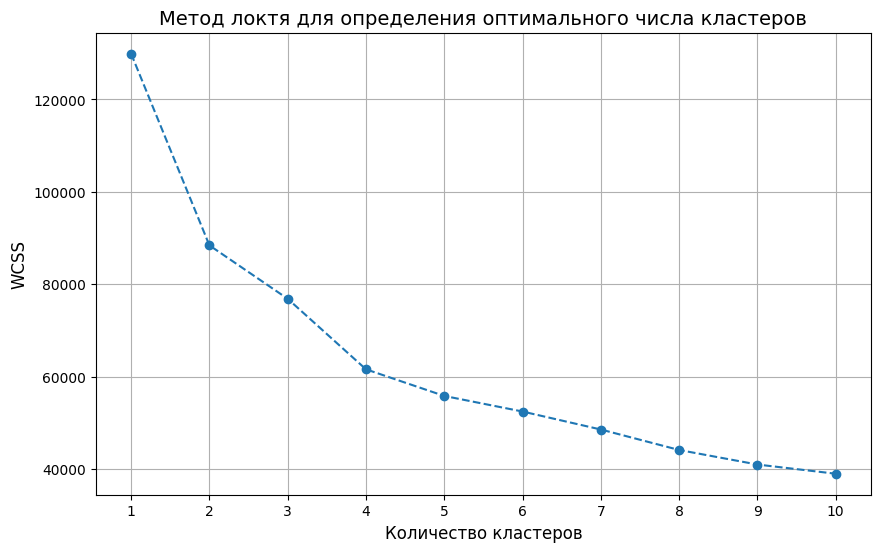

In [8]:
# Вычисление WCSS для разных значений K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров', fontsize=14)
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Результат: Оптимальное число кластеров – 3.

## Анализ результатов для разных K
### Кластеризация при оптимальном количестве кластеров (K=3)

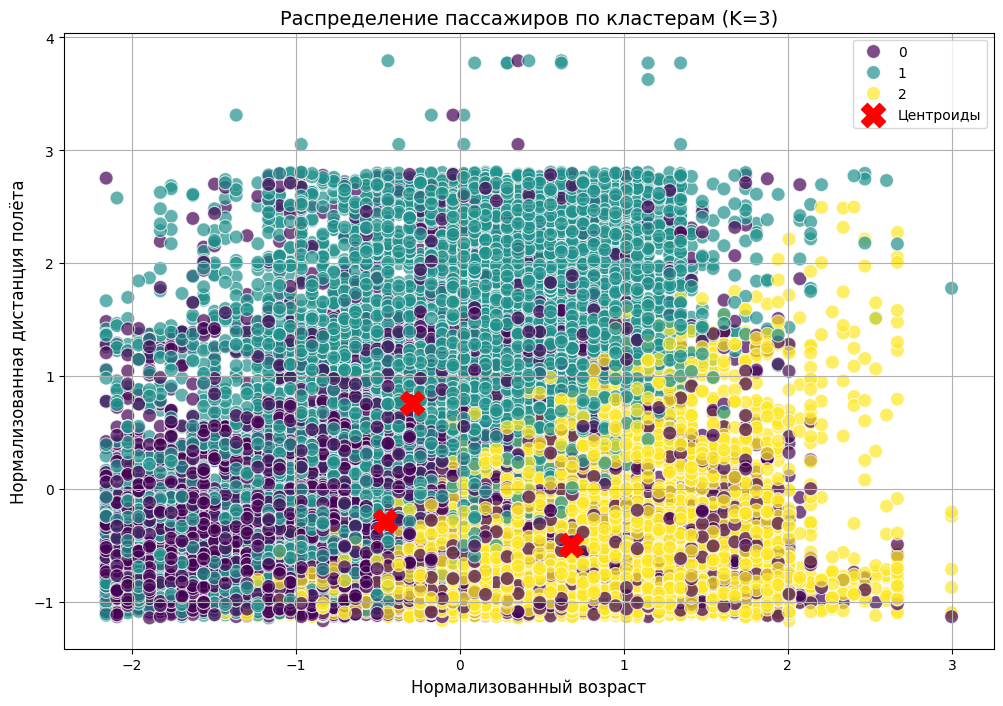


Средние значения признаков:


,Age,Flight Distance,Seat comfort,Food and drink,Inflight entertainment
Cluster,,,,,
0,32.758852,913.687663,2.044726,1.910921,1.989067
1,35.262531,1958.891132,4.259809,4.046949,4.271490
2,49.903722,700.633988,3.905588,3.562960,3.682622


In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clean['Cluster'] = clusters

# Визуализация
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, 
                palette='viridis', alpha=0.7, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Центроиды')
plt.title(f'Распределение пассажиров по кластерам (K={k})', fontsize=14)
plt.xlabel('Нормализованный возраст', fontsize=12)
plt.ylabel('Нормализованная дистанция полёта', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Характеристики кластеров
print("\nСредние значения признаков:")
display(df_clean.groupby('Cluster')[features].mean().style.background_gradient(cmap='Blues'))

### Кластеризация при дургих значениях K

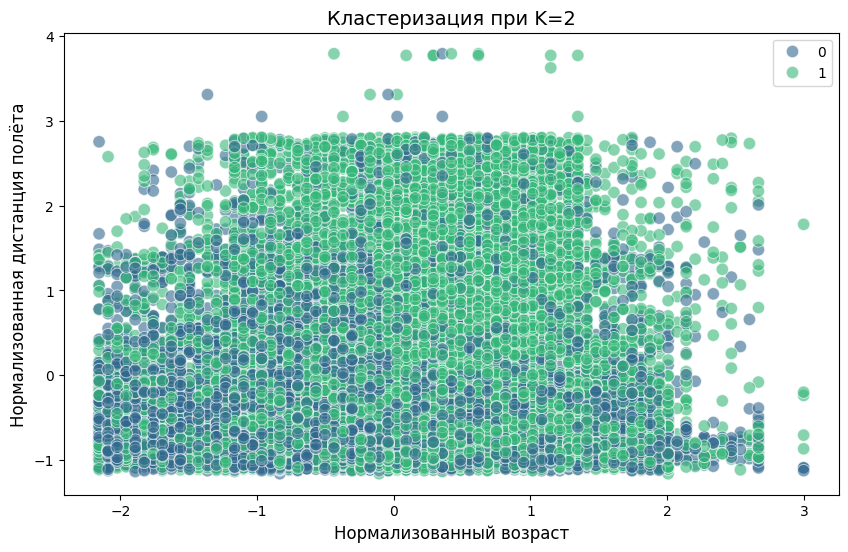


Средние характеристики для K=2:


,Age,Flight Distance,Seat comfort,Food and drink,Inflight entertainment
Cluster,,,,,
0,36.535728,928.049944,2.318743,2.130471,2.182566
1,41.779246,1379.687189,4.240055,3.974287,4.179861


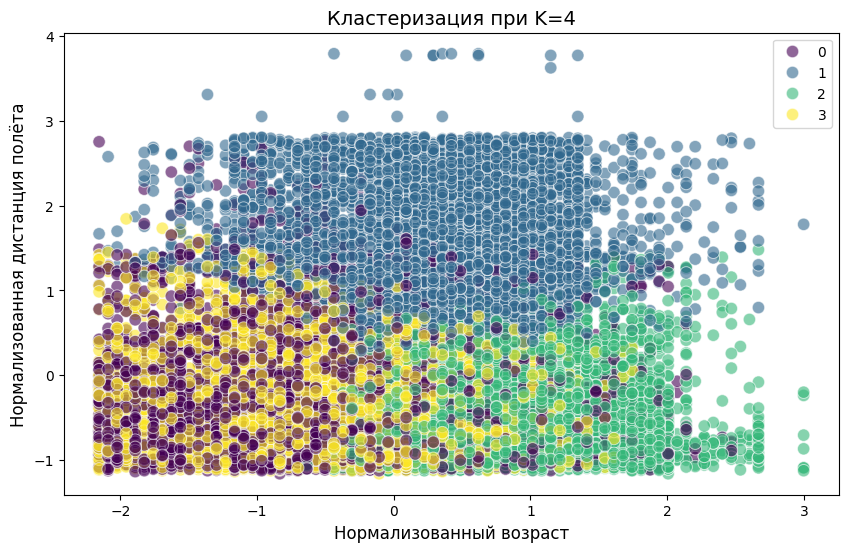


Средние характеристики для K=4:


,Age,Flight Distance,Seat comfort,Food and drink,Inflight entertainment
Cluster,,,,,
0,29.996107,850.638933,1.952992,1.875559,1.927614
1,44.882397,2782.380263,4.015396,3.448340,3.915415
2,53.149687,698.935210,3.599345,3.125856,3.223712
3,32.059256,781.171424,4.359862,4.460496,4.483997


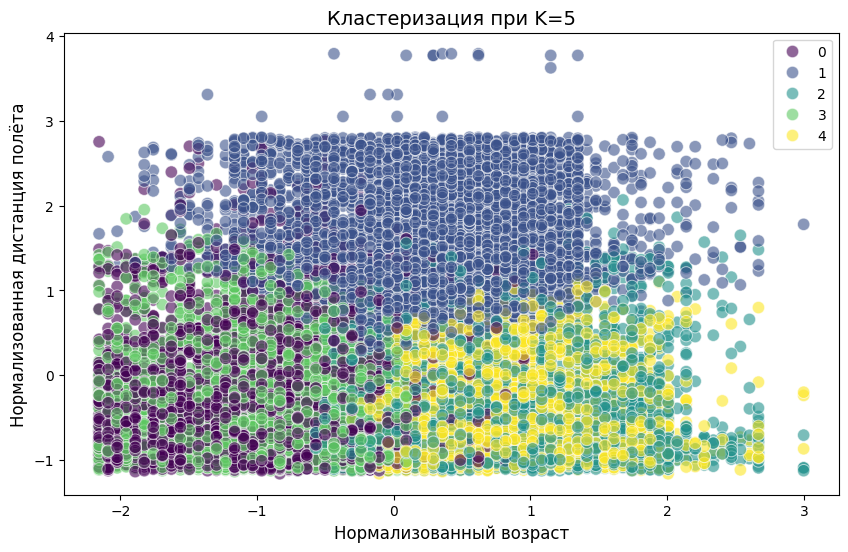


Средние характеристики для K=5:


,Age,Flight Distance,Seat comfort,Food and drink,Inflight entertainment
Cluster,,,,,
0,26.107602,850.553974,1.928497,1.888407,1.926241
1,44.341865,2840.953770,3.996032,3.425198,3.890079
2,51.349546,752.634627,2.964486,2.530786,2.525767
3,26.003439,817.069377,4.304612,4.457120,4.455906
4,51.629234,762.836007,4.298673,4.006734,4.238463


In [10]:
for k in [2, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters,
                   palette='viridis', alpha=0.6, s=80)
    plt.title(f'Кластеризация при K={k}', fontsize=14)
    plt.xlabel('Нормализованный возраст', fontsize=12)
    plt.ylabel('Нормализованная дистанция полёта', fontsize=12)
    plt.show()
    
    temp_df = df_clean.copy()
    temp_df['Cluster'] = clusters
    print(f"\nСредние характеристики для K={k}:")
    display(temp_df.groupby('Cluster')[features].mean())

# Анализ результатов

## Интерпретация для k=3:

Кластер 0 – бюджетные пассажиры (молодые, короткие перелеты, низкие оценки)

Кластер 1 – пассажиры бизнес-класса (средний возраст, длинные перелеты, высокие оценки)

Кластер 2 – пассажиры старшего возраста (умеренные оценки)  

## Интерпретация при других значениях k:

- При k=2 пассажиры делятся на бюджетныйх и пассажиров бизнес-класса (примитивное разделение, подходящее для простых исследований)
- При k=4 добавляются пассажиры крайних возрастов (<18 или >65) и крайние расстояния (очень короткие или очень длинные), подходит для работы с низшевыми группами людей
- При k=5 кластеры начинают отличаться только по одному признаку, и в некоторых может содержаться около 5%  данных, что делает такую сегментацию избыточной и влечет риск переобучения

# Выводы
1. Реализован кластерный анализ данных авиаперевозок

2. Оптимальное число кластеров – 3

3. Выявлены значимые сегменты пассажиров

4. Полученные результаты могут быть использованы для:

- Персонализации сервиса

- Оптимизации маркетинговых стратегий

# Список литературы
1. Scikit-learn documentation / https://scikit-learn.org

2. Pandas documentation / https://pandas.pydata.org

3. McKinney W. Python for Data Analysis. – O'Reilly, 2022.
